In [3]:
%matplotlib inline
import pandas as pd

In [4]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
a=cast.copy()

In [6]:
a['title'].value_counts().head(10)

Around the World in Eighty Days       1298
7 cajas                                689
Thelma                                 580
The Ten Commandments                   533
The Eschatrilogy: Book of the Dead     517
Catching Faith                         493
The Dark Knight Rises                  452
Welcome to Essex                       448
Cockneys vs Zombies                    437
The Buccaneer                          436
Name: title, dtype: int64

In [16]:
a.groupby('year').groups


{1894: Int64Index([464860, 555929, 2514470], dtype='int64'),
 1900: Int64Index([1718063, 1718214], dtype='int64'),
 1905: Int64Index([600975], dtype='int64'),
 1906: Int64Index([ 323907,  468955,  475290,  652297,  722284,  766513, 1226631,
             1391326, 1445601, 1493606, 1587360, 2147067, 2147068, 2147078,
             3021921, 3469812, 3604619],
            dtype='int64'),
 1907: Int64Index([608021, 789493, 864844, 1471569, 2254264], dtype='int64'),
 1908: Int64Index([ 148472,  297732,  297733,  300565,  409498,  526885,  537636,
              702280,  766512,  802084,  935548,  935549, 1025256, 1085787,
             1538728, 1584272, 1587358, 1642857, 1718975, 1968251, 1968252,
             2050185, 2205985, 2310694, 2311035, 2324443, 2370042, 2370043,
             2389412, 2556033, 2566360, 2574092, 2745706, 2851440, 2875958,
             2944740, 2958340, 3045548, 3201254, 3315364, 3464347, 3594557],
            dtype='int64'),
 1909: Int64Index([298771, 918685, 1074907], 

### Which three years of the 1930s saw the most films released?

In [31]:
b=a[(a['year']>1929) & (a['year']<1940)]
c=b.groupby('year')['title'].nunique()
c.nlargest(3)

year
1937    1053
1936    1045
1938     971
Name: title, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [8]:
aa=cast.copy()

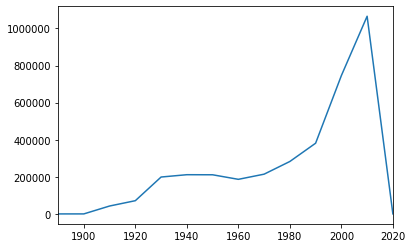

In [24]:
aa['decade']= (aa['year']//10)*10
aa['decade'].value_counts().sort_index().plot()

pandas.core.frame.DataFrame

### Plot the number of "Hamlet" films made each decade.

In [27]:
aa[aa['title']=='Hamlet']['year'].unique()

array([1996, 1921, 2009, 1913, 2000, 1964, 1990, 1969, 2015, 1948, 1973,
       2011, 1976, 1911, 1910, 1987, 1954], dtype=int64)

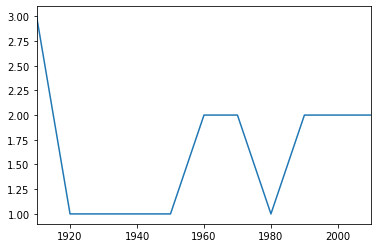

In [40]:
b=aa[aa['title']=='Hamlet']['year'].unique()
b=(b//10)*10
b=pd.DataFrame(b)
b[0].value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

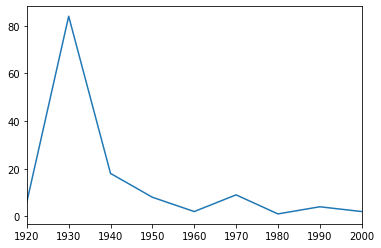

In [51]:
aa[aa['character']=='Rustler']['decade'].value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

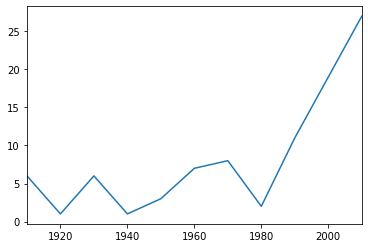

In [52]:
aa[aa['character']=='Hamlet']['decade'].value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [58]:
aa['character'].value_counts().head(11)

Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [62]:
aa[aa['character']=='Herself']['name'].value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Mary Jo Pehl           7
Hillary Clinton        6
Joan Rivers            6
Marilyn Monroe         5
Caroline Rhea          5
Rekha                  5
Bunny Yeager           5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [64]:
aa[aa['character']=="Himself"]['name'].value_counts().head(10)

Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
George W. Bush           23
Ron Jeremy               23
Winston Churchill        23
Benito Mussolini         22
Bill Clinton             20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [70]:
aa[(aa['year']==1945) & (aa['type']=='actor')]['name'].value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [76]:
aa[(aa['year']==1945) & (aa['type']=='actress')]['name'].value_counts().head(1)

Bess Flowers    29
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

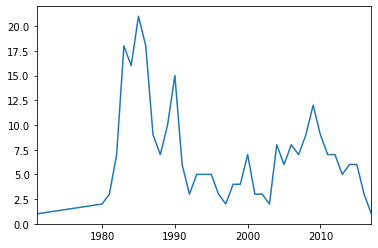

In [83]:
aa[aa['name']=='Mammootty']['year'].value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [86]:
aa[aa['character'].str.startswith('Patron in')]['character'].value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [90]:
aa[aa['character'].str.startswith('Science')]['character'].value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              6
Science Reporter         5
Science Club Member      5
Science Promo Cadet      5
Science                  4
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

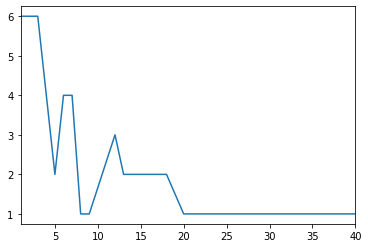

In [96]:
aa[aa['name']=='Judi Dench']['n'].value_counts().sort_index().plot()

### Plot the n-values of Cary Grant's roles through his career.

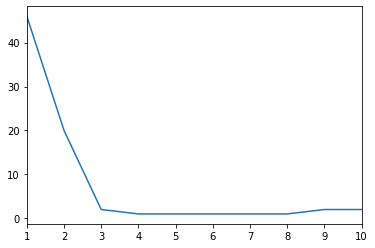

In [106]:
aa[aa['name']=='Cary Grant']['n'].value_counts().sort_index().plot()

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

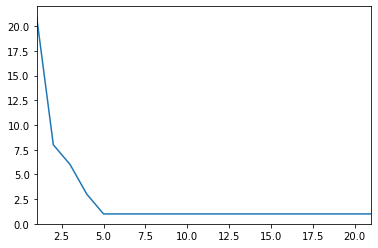

In [107]:
aa[aa['name']=='Sidney Poitier']['n'].value_counts().sort_index().plot()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [110]:
aa[(aa['decade']==1950) & (aa['type']=='actor') & (aa['n']==1)].count()

title        6599
year         6599
name         6599
type         6599
character    6599
n            6599
decade       6599
dtype: int64

In [111]:
aa[(aa['decade']==1950) & (aa['type']=='actress') & (aa['n']==1)].count()

title        2953
year         2953
name         2953
type         2953
character    2953
n            2953
decade       2953
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [113]:
aa[(aa['decade']==1950) & (aa['type']=='actor') & (aa['n']==2)].count()

title        4550
year         4550
name         4550
type         4550
character    4550
n            4550
decade       4550
dtype: int64

In [114]:
aa[(aa['decade']==1950) & (aa['type']=='actress') & (aa['n']==2)].count()

title        4544
year         4544
name         4544
type         4544
character    4544
n            4544
decade       4544
dtype: int64